In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
from quantumnetworks import SingleModeSystem, plot_full_evolution, animate_evolution, DoubleModeSystem, MultiModeSystem, plot_evolution_phase_space,plot_full_evolution_phase_space
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 20e6

# Pulse Drive

In [32]:
# N modes

gaussian_drive_gen = lambda amp, a, w, t0, t: amp*np.exp(1j*w*t) * np.exp(-a*(t-t0)**2) # gaussian envelope + carrier frequency centered at time t0

wd = 1
a = 5
t0 = 2
amp = 1000

N = 200
wr = 1
g = 2
omegas = [2*np.pi*wr]*N
kappas = [0]*N
kappas[0] = 2*np.pi*0.005 
# gammas = [2*np.pi*0.005]*N
gammas = np.zeros(N)
kerrs = np.zeros(N)
couplings = []
for i in range(N):
    couplings.append([i,(i+1)%N,2*np.pi*g])

drives = {0:lambda t: gaussian_drive_gen(amp, a, 2*np.pi*(wd), t0, t)}

sys = MultiModeSystem(params={"omegas":omegas, "kappas":kappas, "gammas":gammas, "kerrs":kerrs, "drives":drives, "couplings":couplings})

x_0 = np.array([0,0]*N)
ts = np.linspace(0, 20, 1001)

In [33]:
X = sys.trapezoidal(x_0, ts)

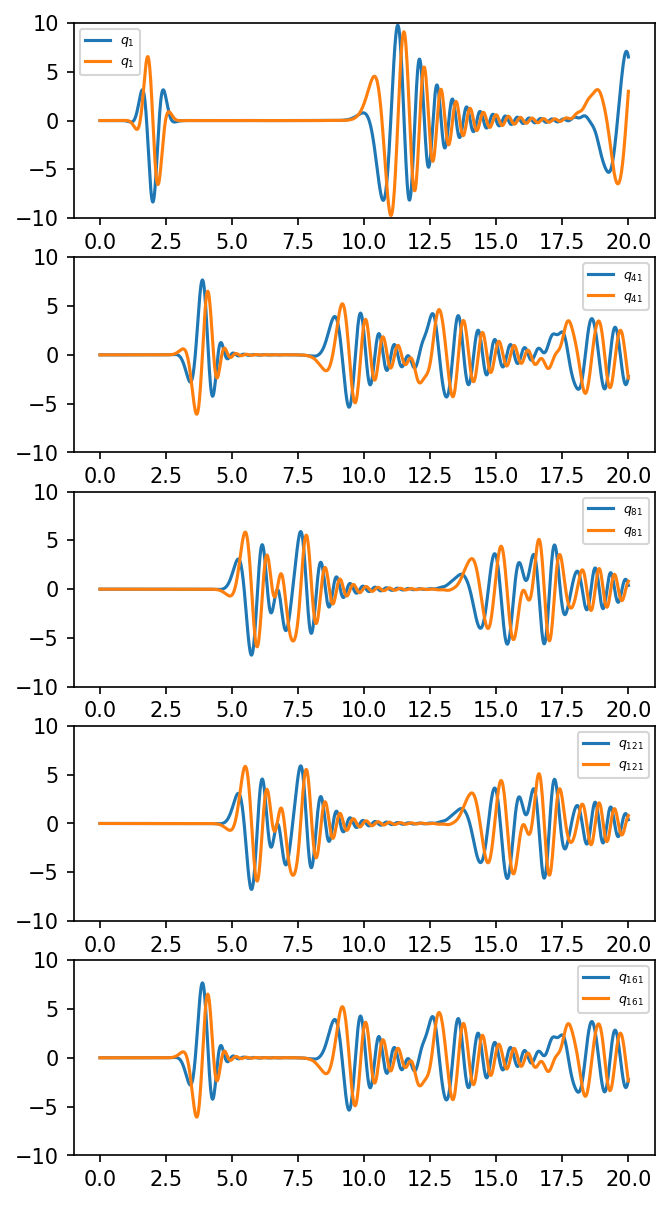

In [37]:
num_plots = 5
fig, axs = plt.subplots(num_plots,1, figsize=(5,2*num_plots), dpi=150)

ylim = np.array([-10,10])

for j in range(0,num_plots):
    i = j*N//num_plots
    ax = axs[j]
    labels = ["$q_{" + str(i+1) + "}$","$p_{" + str(i+1) + "}$"]
    # plot_full_evolution(X[2*i:2*(i+1)], ts, fig=fig, ax=ax, labels=labels)
    ax.plot(ts, X[2*i,:], label=labels[0])
    ax.plot(ts, X[2*i+1,:], label=labels[0])
    # ax.plot(ts, X[2*i:2*(i+1),:], fig=fig, ax=ax, labels=labels)
    ax.legend(fontsize=6)
    # ax.set_title(None)
    ax.set_xlabel(None)
    ax.set_ylim(*ylim)

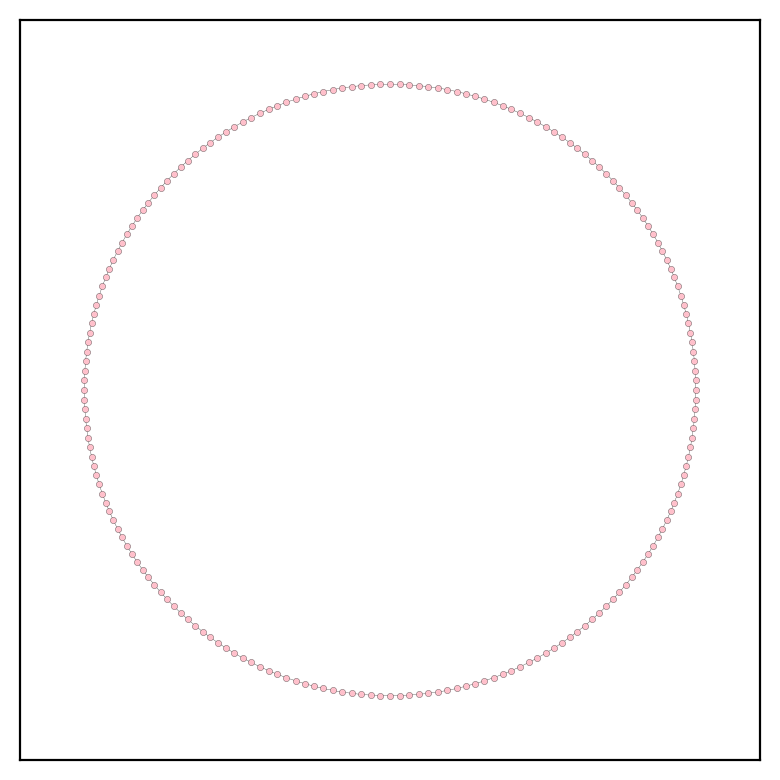

In [57]:
fig, ax = plt.subplots(1, figsize=(4, 4), dpi=200, squeeze=False)
ax = ax[0][0]
pos = {}
for i in range(N):
    pos[i]=[np.cos(i/N*2*np.pi + np.pi), np.sin(i/N*2*np.pi + np.pi)]
_ = sys.draw_network(ax=ax, pos=pos, with_edge_labels=False, with_node_labels=False, node_size=5, width=.1, linewidths=.1)

In [58]:
fig, ax = plt.subplots(1, figsize=(4, 4), dpi=200, squeeze=False)
ax = ax[0][0]
sys.animate_networkx(X, ts, ax=ax, pos=pos, animation_time=5, num_frames=104, with_edge_labels=False, with_node_labels=False, save_animation=True, node_size=5, width=.1, linewidths=.1)

(<Figure size 800x800 with 1 Axes>, <AxesSubplot:title={'center':'t = 19.82'}>)